In [26]:
#Importing all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing


In [10]:
from google.colab import files
uploaded = files.upload()

Saving mcdonalds.csv to mcdonalds.csv


In [12]:
df = pd.read_csv("mcdonalds.csv")

In [13]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [15]:
df.shape

(1453, 15)

In [16]:
df.isnull().sum()

,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0
healthy,0


In [17]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [18]:
df['Like'].value_counts()

,count
Like,
+3,229
+2,187
0,169
+4,160
+1,152
I hate it!-5,152
I love it!+5,143
-3,73
-4,71


In [20]:
df['Gender'].value_counts()
df['VisitFrequency'].value_counts()
df['Like'].value_counts()

,count
Like,
+3,229
+2,187
0,169
+4,160
+1,152
I hate it!-5,152
I love it!+5,143
-3,73
-4,71


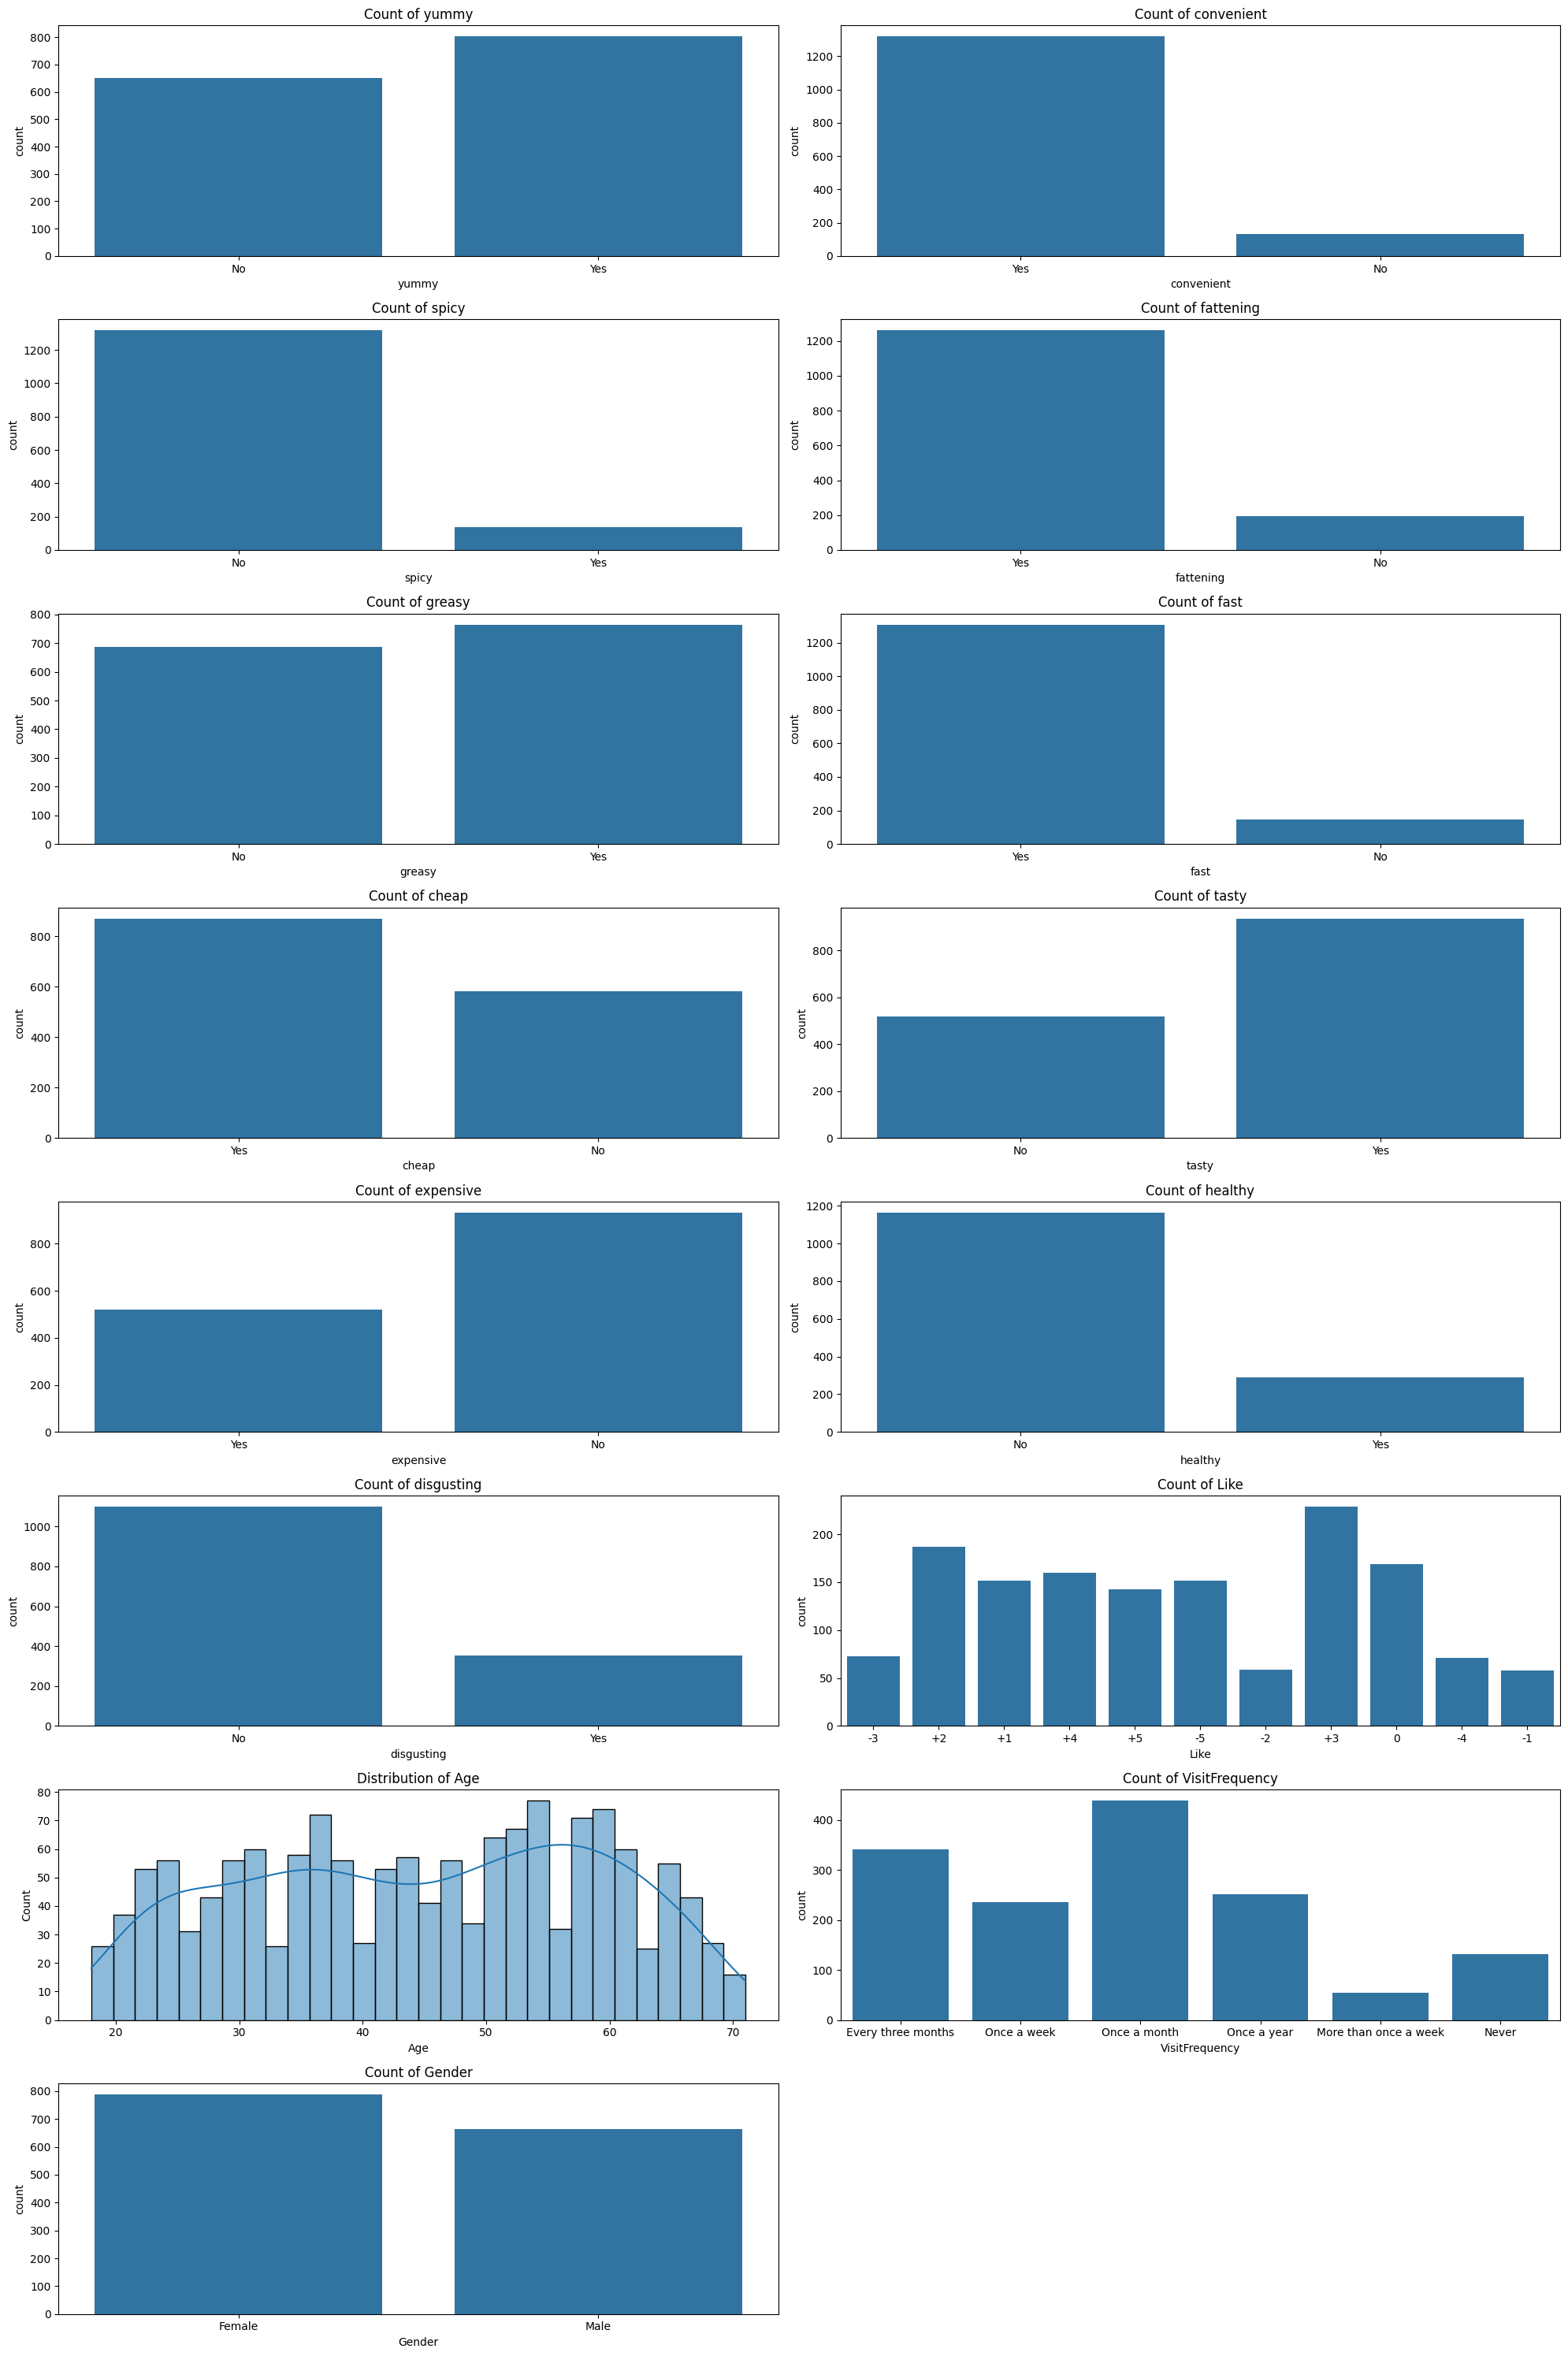

ValueError: could not convert string to float: 'No'

In [29]:
from warnings import filterwarnings

def EDA(data, figsize):
    # Suppress warnings
    filterwarnings("ignore")

    categorical = []
    continuous = []
    num_plots = int((data.shape[1] + 1) / 2)
    plt.figure(figsize=figsize)

    for index, column in enumerate(data.columns, start=1):
        if data[column].dtype == "object":
            categorical.append(column)
            plt.subplot(num_plots, 2, index)
            sns.countplot(x=column, data=data)
            plt.title(f'Count of {column}')
        else:
            continuous.append(column)
            plt.subplot(num_plots, 2, index)
            sns.histplot(data[column], kde=True, bins=30)
            plt.title(f'Distribution of {column}')

    plt.tight_layout()
    plt.show()

    # Display the correlation matrix
    correlation_matrix = data.corr()
    print(correlation_matrix)

# Apply the EDA function on the dataset
EDA(df, (20, 30))

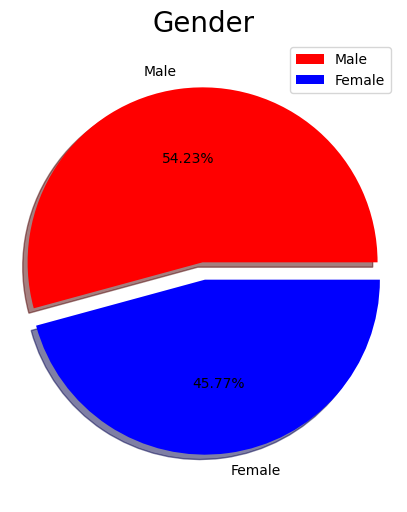

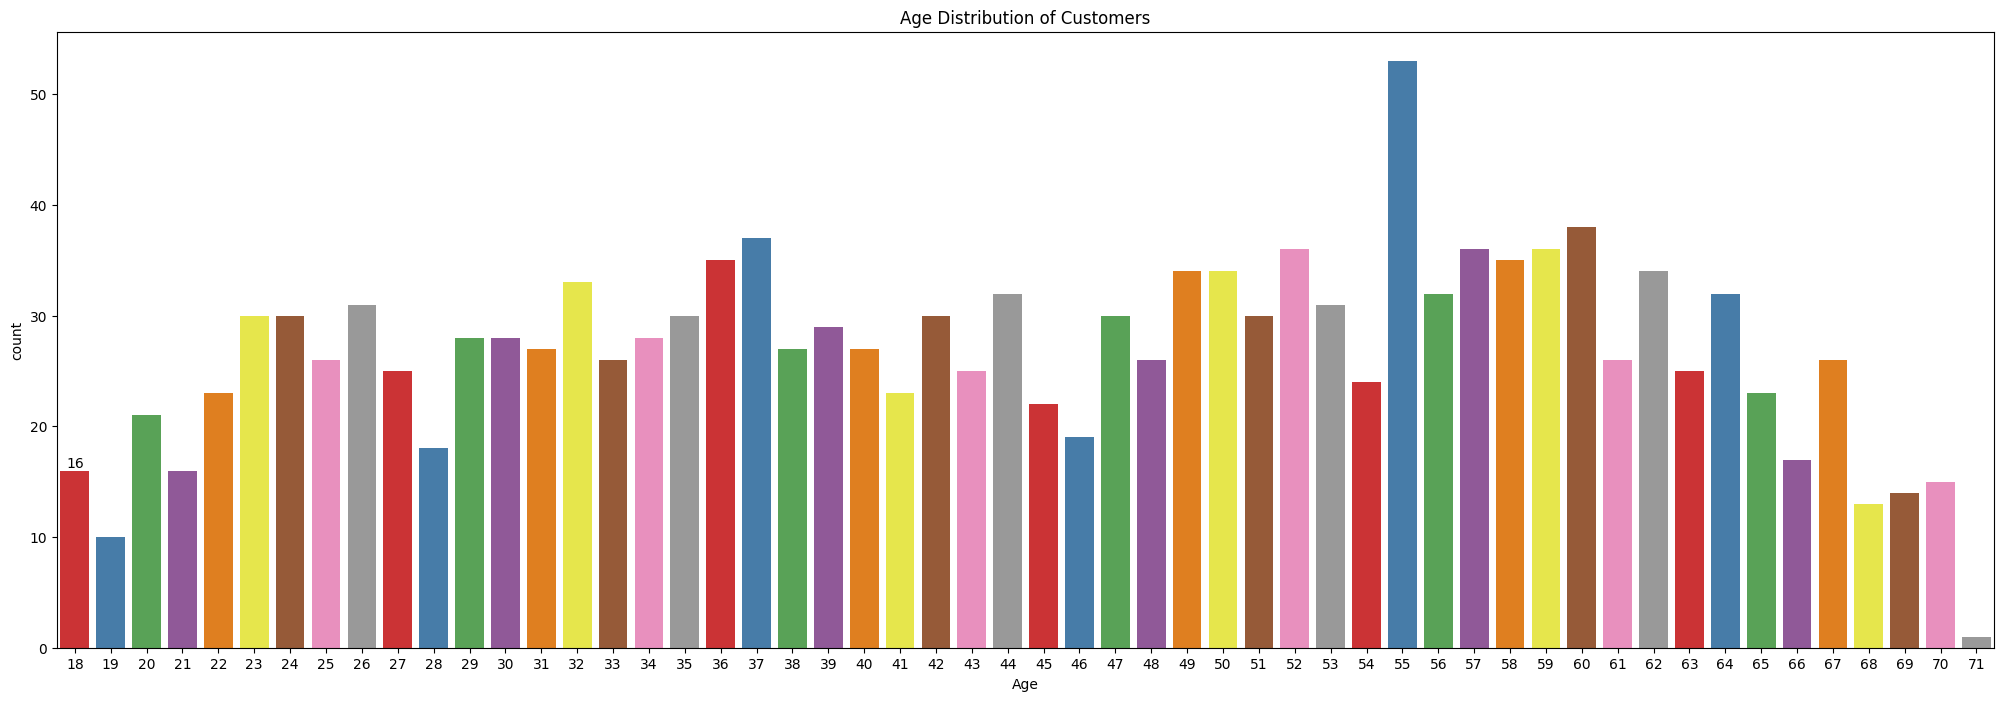

In [28]:
# Customer segmentation  #1 - Socio-Demographs
labels = ["Male", "Female"]
size = df['Gender'].value_counts()
colors = ['red','blue']
explode_values = [0, 0.1]
plt.figure(figsize=(5, 6))
plt.pie(size,
         colors=colors,
         explode=explode_values,
         labels=labels,
         shadow=True,
         autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('equal')  # Ensures the pie chart is circular
plt.legend(loc='upper right')  # Adjust legend location if needed
plt.show()
# Interpretation: More female customers than male.

# Age Distribution
plt.figure(figsize=(25, 8))
age_plot = sns.countplot(x='Age', data=df, palette='Set1')
age_plot.bar_label(age_plot.containers[0])
plt.title('Age Distribution of Customers')
plt.show()

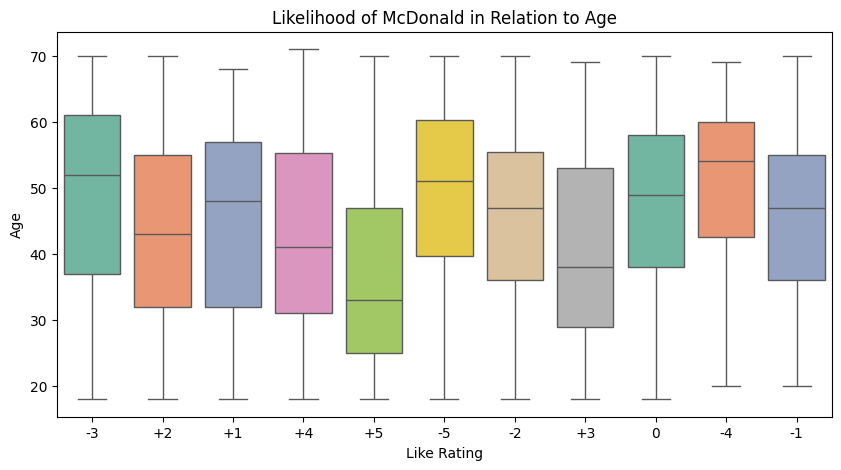

In [30]:
#Customer Segmentation #2 - Psychographic demonstration
# Replace values in the 'Like' column
df['Like'] = df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'})

# Box Plot for 'Like' with respect to 'Age'
plt.figure(figsize=(10, 5))
sns.boxplot(x='Like', y='Age', data=df, palette='Set2')
plt.title('Likelihood of McDonald in Relation to Age')
plt.xlabel('Like Rating')
plt.ylabel('Age')
plt.show()


In [32]:
# List of categorical features to encode
cat_features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# One-hot encode the categorical features
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

# Display the updated DataFrame
df_encoded


,Like,Age,VisitFrequency,Gender,yummy_1,convenient_1,spicy_1,fattening_1,greasy_1,fast_1,cheap_1,tasty_1,expensive_1,healthy_1,disgusting_1
0,-3,61,Every three months,Female,False,True,False,True,False,True,True,False,True,False,False
1,+2,51,Every three months,Female,True,True,False,True,True,True,True,True,True,False,False
2,+1,62,Every three months,Female,False,True,True,True,True,True,False,True,True,True,False
3,+4,69,Once a week,Female,True,True,False,True,True,True,True,True,False,False,True
4,+2,49,Once a month,Male,False,True,False,True,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,-5,47,Once a year,Male,False,True,False,True,True,False,False,False,True,False,True
1449,+2,36,Once a week,Female,True,True,False,True,False,False,True,True,False,True,False
1450,+3,52,Once a month,Female,True,True,False,True,False,True,False,True,True,False,False
1451,+4,41,Every three months,Male,True,True,False,False,False,True,True,True,False,True,False


In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Function to convert categorical columns to numeric
def encode_categorical(df):
    le = LabelEncoder()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = le.fit_transform(df[column])
    return df

# Ensure df_encoded only has numeric data
df_encoded = encode_categorical(df_encoded)

# Standardize the data
scaler = StandardScaler()
pca_data = scaler.fit_transform(df_encoded)

# Perform PCA
n_components = min(pca_data.shape)  # Use the smaller dimension to set n_components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(pca_data)

# Create a DataFrame with the principal components
component_names = [f'pc{i+1}' for i in range(n_components)]
pf = pd.DataFrame(data=principal_components, columns=component_names)

# Display the first few rows of the DataFrame
pf.head()


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15
0,-0.991608,-1.111445,-0.479535,0.039025,-2.287302,-0.688992,-0.651472,0.531916,0.084722,0.129661,0.208763,-0.556409,-0.411449,0.317147,1.771503
1,0.997168,0.943356,0.845057,0.431548,-1.021043,-1.354625,-0.606344,0.015006,-0.478966,0.187064,-0.818002,0.835185,0.083458,0.293841,1.531214
2,0.334040,0.971290,-1.464718,3.421326,-0.285385,-1.157358,-2.085007,0.393833,0.362007,0.620221,-1.741362,-0.638897,-0.588953,-1.243248,-0.079883
3,0.191800,-1.001895,1.093322,0.161527,0.423979,0.086893,-0.999722,-0.435166,-0.529292,0.865660,-0.446619,1.822406,1.880064,0.359047,-0.209596
4,0.176430,-1.141783,0.092118,0.368037,0.520511,0.255687,1.066039,0.574027,1.411273,1.407668,-1.943847,-0.676177,-0.911346,0.107104,-0.110140


In [37]:
pca.explained_variance_ratio_

array([0.21247389, 0.1175697 , 0.10626633, 0.07384436, 0.07047422,
       0.06539997, 0.06440206, 0.0555542 , 0.04796693, 0.04026328,
       0.03857815, 0.03601459, 0.03402267, 0.02013783, 0.01703183])

In [39]:
# Extract loadings (coefficients of the principal components)
loadings = pca.components_

# Get the number of principal components
num_pc = loadings.shape[0]

# Create a list of PC names
pc_list = ["PC" + str(i) for i in range(1, num_pc + 1)]

# Create a DataFrame for loadings
loadings_df = pd.DataFrame(loadings.T, columns=pc_list)  # Transpose to have features as rows
loadings_df['feature'] = df_encoded.columns.values  # Add feature names
loadings_df = loadings_df.set_index('feature')  # Set feature names as index

# Display the loadings DataFrame
loadings_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
feature,,,,,,,,,,,,,,,
Like,-0.376046,-0.206944,-0.036310,0.050812,0.062235,0.023847,-0.033158,0.190527,0.052037,-0.065233,0.727045,0.317244,-0.364547,0.025039,0.017276
Age,-0.089499,-0.359692,-0.376031,0.174858,-0.348269,0.094924,-0.222918,-0.238099,-0.104064,0.365517,-0.230960,0.486203,0.090823,0.107208,0.006408
VisitFrequency,-0.017474,-0.043244,0.055708,-0.241550,0.432875,0.815214,-0.245029,-0.123223,0.057075,0.028660,-0.040767,0.035808,0.040657,0.005299,-0.022215
Gender,-0.077587,0.147660,-0.145504,0.253986,0.019651,0.304686,0.849211,-0.167579,0.016014,0.192652,0.021748,0.028035,-0.059791,0.024843,-0.034806
yummy_1,0.411622,0.297475,0.037623,-0.010481,0.152882,-0.082514,-0.038833,-0.071002,-0.209057,0.078392,0.245985,0.240216,0.089718,0.721420,-0.085214
convenient_1,0.289078,0.008634,0.162996,0.238875,-0.340739,0.204022,-0.029085,0.158715,0.720887,-0.111864,0.144273,0.127269,0.279515,0.033473,0.022672
spicy_1,0.005569,-0.030052,-0.154911,0.784613,0.241187,0.024617,-0.260551,-0.265104,-0.060703,-0.250184,0.066224,-0.297795,-0.027247,0.024823,-0.042480
fattening_1,-0.135736,0.124515,0.541141,0.122432,-0.213060,0.034510,-0.178140,-0.207549,-0.013607,0.639423,0.164833,-0.278781,-0.128641,-0.011389,-0.078984
greasy_1,-0.221607,0.167253,0.428474,0.229630,0.307339,-0.159096,0.000731,0.035592,0.177986,-0.069387,-0.454924,0.513530,-0.238374,0.028278,-0.027854


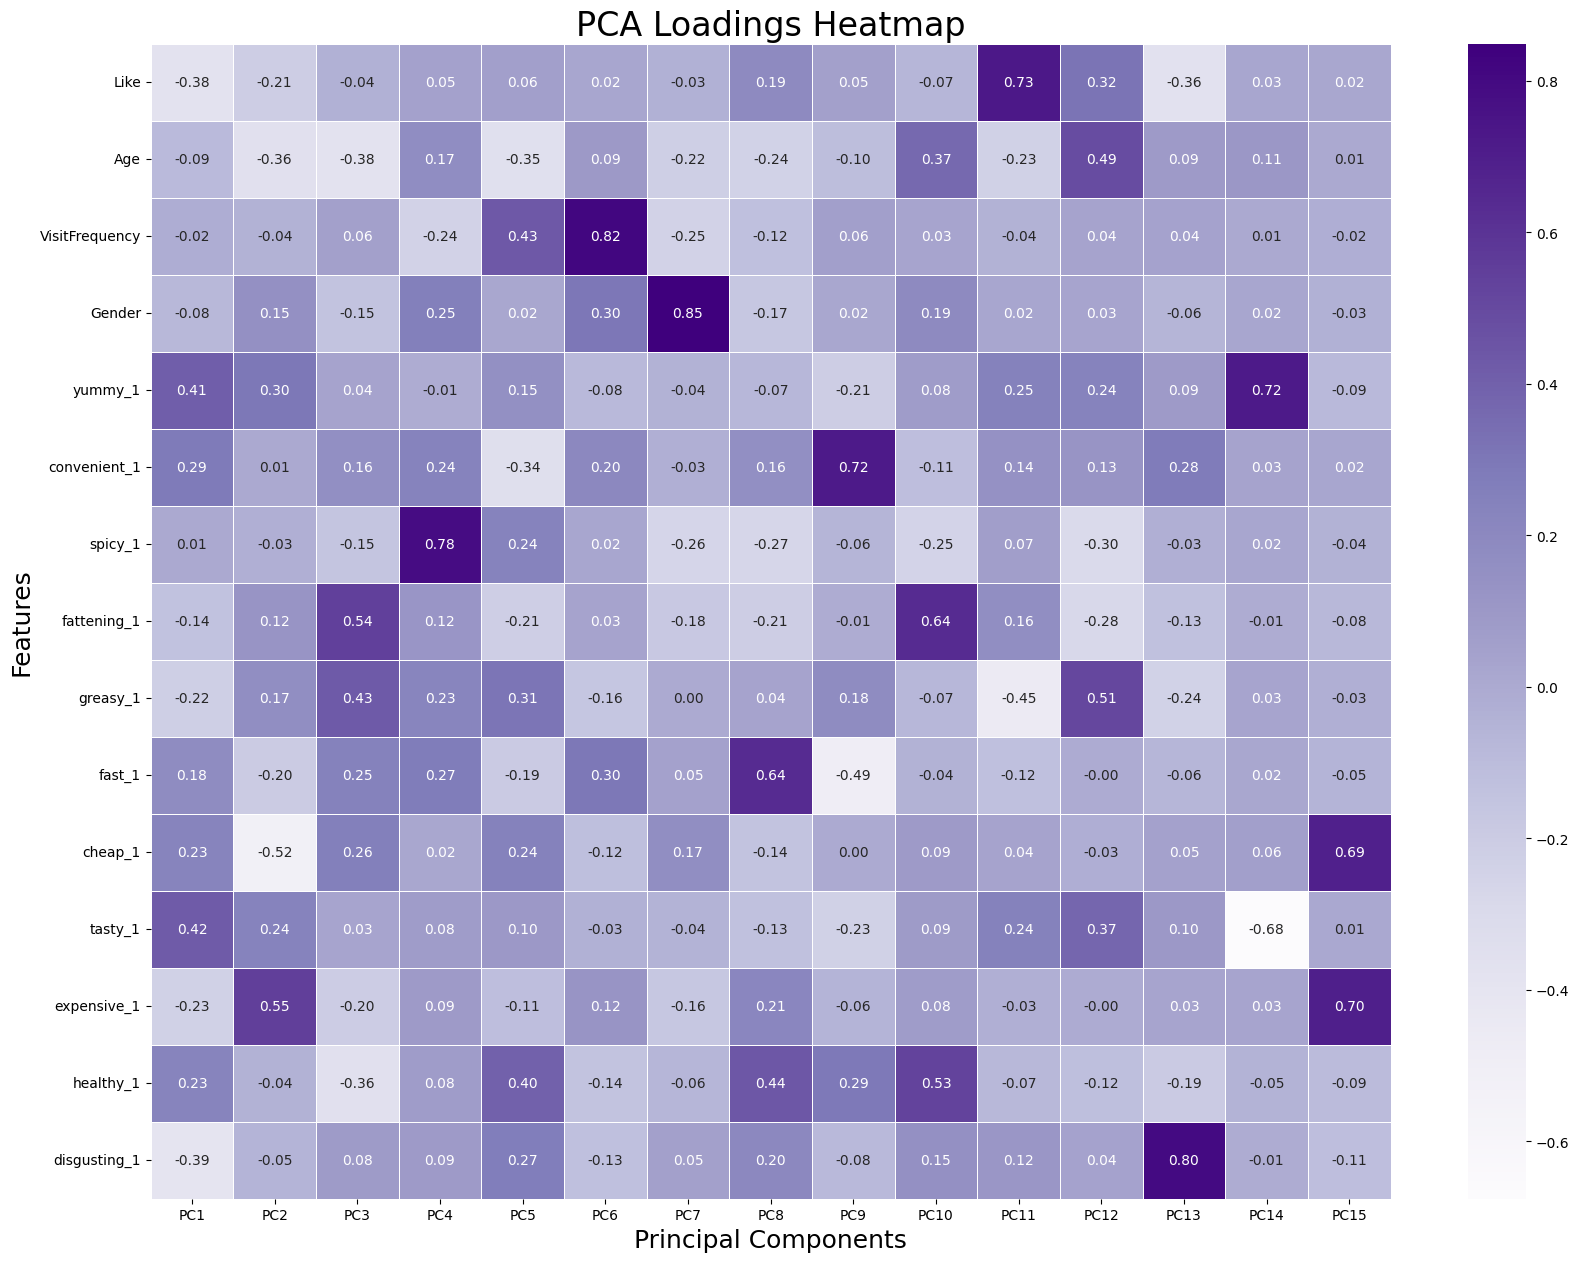

In [41]:
plt.rcParams['figure.figsize'] = (20, 15)

# Create the heatmap with annotations
ax = sns.heatmap(loadings_df, annot=True, cmap='Purples', fmt='.2f', linewidths=.5)

# Set titles and labels
plt.title('PCA Loadings Heatmap', fontsize=24)
plt.xlabel('Principal Components', fontsize=18)
plt.ylabel('Features', fontsize=18)

# Show the plot
plt.show()


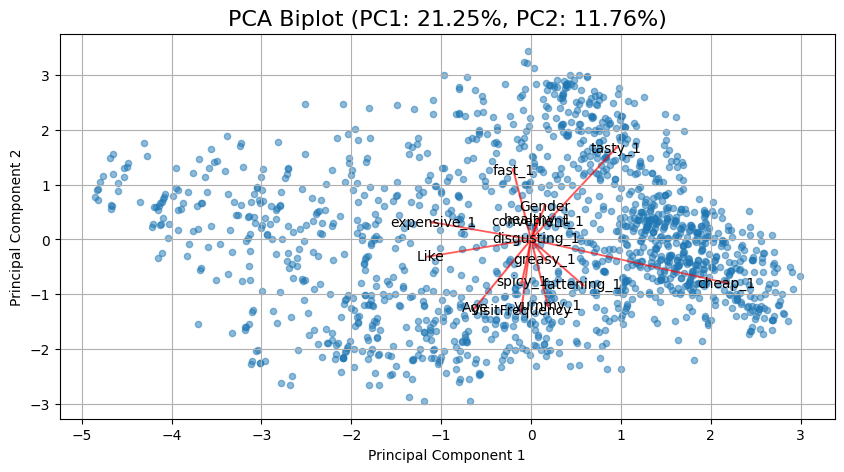

In [51]:
def biplot(cscore, loadings, labels, var1, var2, show=True, dim=(10, 5)):
    plt.figure(figsize=dim)

    # Create a scatter plot for the PCA scores with smaller dots
    plt.scatter(cscore[:, 0], cscore[:, 1], alpha=0.5, s=20)  # Adjust the size here with 's'

    # Add arrows for loadings
    for i in range(loadings.shape[0]):
        plt.arrow(0, 0, loadings[i, 0] * max(cscore[:, 0]), loadings[i, 1] * max(cscore[:, 1]),
                  color='r', alpha=0.5, width=0.01)
        plt.text(loadings[i, 0] * max(cscore[:, 0]), loadings[i, 1] * max(cscore[:, 1]), labels[i],
                 color='black', ha='center', va='center')

    # Set the titles and labels
    plt.title(f'PCA Biplot (PC1: {var1}%, PC2: {var2}%)', fontsize=16)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()

    if show:
        plt.show()

# Get PCA scores
pca_scores = PCA().fit_transform(pca_data)

# Call the biplot function
biplot(cscore=pca_scores, loadings=loadings, labels=df_encoded.columns.values,
       var1=round(pca.explained_variance_ratio_[0] * 100, 2),
       var2=round(pca.explained_variance_ratio_[1] * 100, 2))


In [56]:
#Applying the K-means Clustering Algorithm
from sklearn.cluster import KMeans
from collections import Counter

# Fit KMeans clustering
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans_model.fit(df_encoded)

# Assign cluster labels to the original DataFrame
df['cluster_num'] = kmeans_model.labels_

# Print various details about the clustering
print('Labels assigned to each data point:', kmeans_model.labels_)
print('Within-cluster sum of squares (WCSS):', kmeans_model.inertia_)
print('Number of iterations to converge:', kmeans_model.n_iter_)
print('Centroids of each cluster:\n', kmeans_model.cluster_centers_)
print('Size of each cluster:', Counter(kmeans_model.labels_))


Labels assigned to each data point: [0 3 0 ... 3 2 1]
Within-cluster sum of squares (WCSS): 43413.98866934377
Number of iterations to converge: 9
Centroids of each cluster:
 [[5.17313433e+00 6.29283582e+01 2.58208955e+00 4.53731343e-01
  4.08955224e-01 8.71641791e-01 1.70149254e-01 8.14925373e-01
  4.26865672e-01 9.10447761e-01 6.53731343e-01 5.46268657e-01
  2.65671642e-01 2.08955224e-01 2.29850746e-01]
 [3.31250000e+00 2.55965909e+01 2.67613636e+00 4.71590909e-01
  7.86931818e-01 9.40340909e-01 4.82954545e-02 9.31818182e-01
  7.21590909e-01 9.37500000e-01 6.30681818e-01 8.12500000e-01
  3.55113636e-01 1.76136364e-01 1.93181818e-01]
 [4.58267717e+00 3.86404199e+01 2.75065617e+00 4.77690289e-01
  5.95800525e-01 9.08136483e-01 6.82414698e-02 8.76640420e-01
  5.17060367e-01 8.63517060e-01 5.24934383e-01 6.50918635e-01
  4.35695538e-01 2.17847769e-01 2.67716535e-01]
 [4.76103896e+00 5.19428571e+01 2.54025974e+00 4.28571429e-01
  4.20779221e-01 9.09090909e-01 9.35064935e-02 8.44155844e-01


Like         -5  -4  -3  -2  -1   0  +1  +2  +3  +4  +5
cluster_num                                            
0            53  29  25  13  12  44  37  36  39  31  16
1            15   4   7  10  12  21  39  50  80  46  68
2            41  17  19  15  15  49  32  52  59  45  37
3            43  21  22  21  19  55  44  49  51  38  22


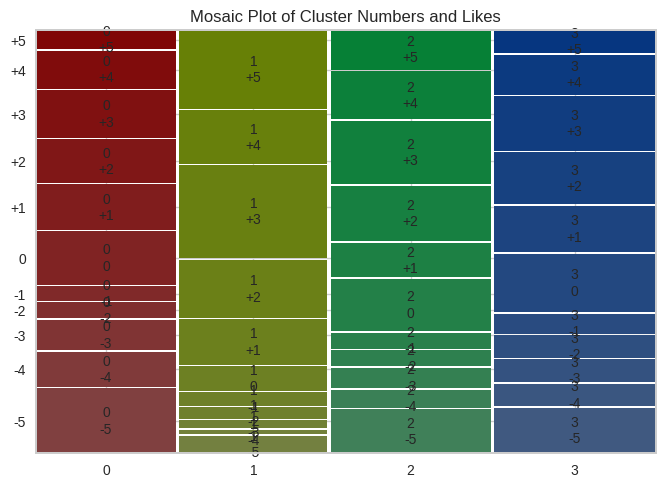

In [62]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a crosstab of cluster numbers and the 'Like' variable
crosstab = pd.crosstab(df['cluster_num'], df['Like'])

# Reorder columns for consistent display
like_order = ['-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', '+5']
crosstab = crosstab[like_order]

# Display the reordered crosstab
print(crosstab)

# Optionally, create a mosaic plot to visualize the relationship
mosaic(crosstab.stack(), title="Mosaic Plot of Cluster Numbers and Likes")
plt.show()

In [63]:
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,183,152
1,186,166
2,199,182
3,220,165


(array([[0., 0., 0., 0., 1., 1., 1., 0., 0., 1.],
        [1., 1., 1., 0., 1., 0., 0., 0., 0., 0.]]),
 array([152. , 158.8, 165.6, 172.4, 179.2, 186. , 192.8, 199.6, 206.4,
        213.2, 220. ]),
 <a list of 2 BarContainer objects>)

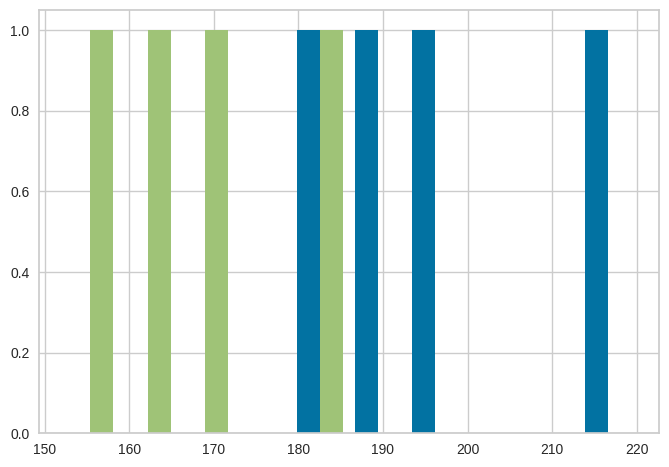

In [64]:
plt.hist(crosstab_gender)


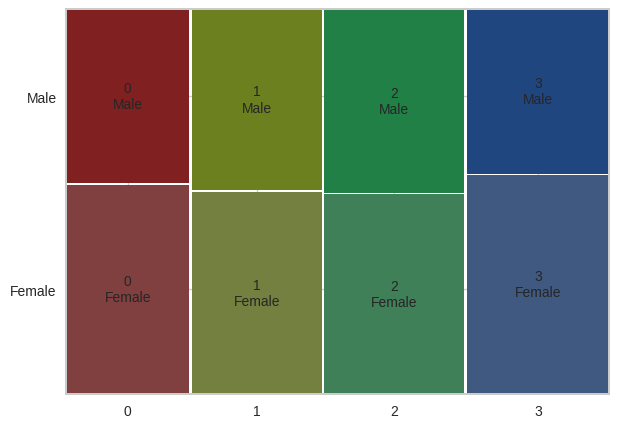

<Axes: xlabel='cluster_num', ylabel='Age'>

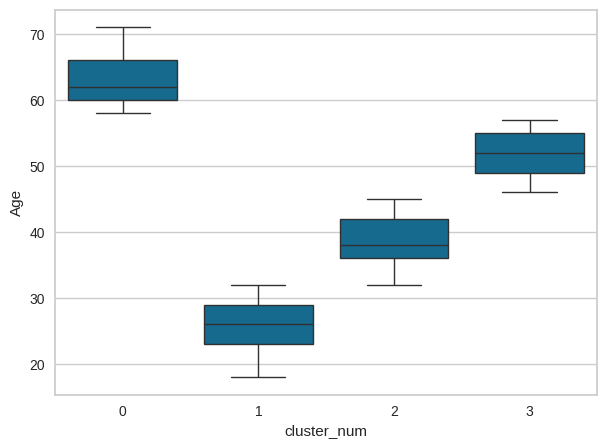

In [67]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

sns.boxplot(x="cluster_num", y="Age", data=df)


In [68]:
#Selecting the target Segment

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'VisitFrequency' column
df['VisitFrequency'] = label_encoder.fit_transform(df['VisitFrequency'])

# Group by 'cluster_num' and calculate the mean visit frequency
mean_visit_frequency = df.groupby('cluster_num')['VisitFrequency'].mean().reset_index()

# Convert the result to a DataFrame
mean_visit_frequency = mean_visit_frequency.rename(columns={'VisitFrequency': 'MeanVisitFrequency'})

# Display the mean visit frequency for each cluster
print(mean_visit_frequency)

   cluster_num  MeanVisitFrequency
0            0            2.582090
1            1            2.676136
2            2            2.750656
3            3            2.540260


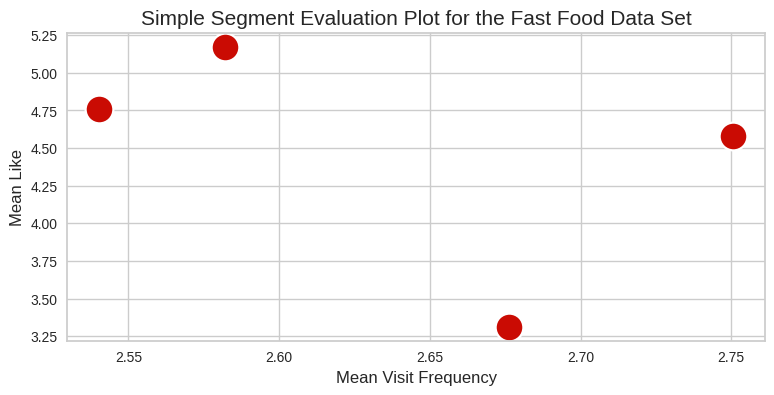

In [72]:
#Calculation of Visitfrequency, like and gender
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode 'VisitFrequency' and calculate mean by cluster
df['VisitFrequency'] = label_encoder.fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean().reset_index()

# Encode 'Like' and calculate mean by cluster
df['Like'] = label_encoder.fit_transform(df['Like'])
like = df.groupby('cluster_num')['Like'].mean().reset_index()

# Encode 'Gender' and calculate mean by cluster
df['Gender'] = label_encoder.fit_transform(df['Gender'])
gender = df.groupby('cluster_num')['Gender'].mean().reset_index()

# Merge the results into a single DataFrame
segment = gender.merge(like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')

# Rename columns for clarity
segment.columns = ['cluster_num', 'MeanGender', 'MeanLike', 'MeanVisitFrequency']

# Plotting
plt.figure(figsize=(9, 4))
sns.scatterplot(x='MeanVisitFrequency', y='MeanLike', data=segment, s=400, color='r')
plt.title("Simple Segment Evaluation Plot for the Fast Food Data Set", fontsize=15)
plt.xlabel("Mean Visit Frequency", fontsize=12)
plt.ylabel("Mean Like", fontsize=12)
plt.show()